In [136]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

In [137]:
data = pd.read_csv('clean_data/renewable_nonrenewable_breakdown_emissions.csv')
data.head()

,Unnamed: 0,1965.0_renewable,1966.0_renewable,1967.0_renewable,1968.0_renewable,1969.0_renewable,1970.0_renewable,1971.0_renewable,1972.0_renewable,1973.0_renewable,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Canada,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,530.094931,541.020754,526.312965,544.096067,553.458312,546.233373,537.777358,549.107572,565.635679,556.188552
1,Mexico,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001610,...,442.611064,465.846905,473.972290,472.839136,459.630951,463.121335,468.791476,476.945856,466.575628,454.972919
2,US,0.133322,0.14062,0.140736,0.15546,0.162271,0.162359,0.165844,0.186730,0.199897,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
3,Total North America,0.133322,0.14062,0.140736,0.15546,0.162271,0.162359,0.165844,0.186730,0.201507,...,6458.421920,6343.303583,6090.259796,6266.531101,6267.654360,6150.761455,6049.000260,6009.923146,6148.997022,5975.854558
4,Argentina,0.000000,0.00000,0.000000,0.00000,0.000000,0.000475,0.000499,0.000644,0.000490,...,166.000124,168.746975,175.268259,182.764622,182.745499,186.021818,185.762130,182.807827,180.394930,174.877271


In [138]:
list(data.columns)

['Unnamed: 0',
 '1965.0_renewable',
 '1966.0_renewable',
 '1967.0_renewable',
 '1968.0_renewable',
 '1969.0_renewable',
 '1970.0_renewable',
 '1971.0_renewable',
 '1972.0_renewable',
 '1973.0_renewable',
 '1974.0_renewable',
 '1975.0_renewable',
 '1976.0_renewable',
 '1977.0_renewable',
 '1978.0_renewable',
 '1979.0_renewable',
 '1980.0_renewable',
 '1981.0_renewable',
 '1982.0_renewable',
 '1983.0_renewable',
 '1984.0_renewable',
 '1985.0_renewable',
 '1986.0_renewable',
 '1987.0_renewable',
 '1988.0_renewable',
 '1989.0_renewable',
 '1990.0_renewable',
 '1991.0_renewable',
 '1992.0_renewable',
 '1993.0_renewable',
 '1994.0_renewable',
 '1995.0_renewable',
 '1996.0_renewable',
 '1997.0_renewable',
 '1998.0_renewable',
 '1999.0_renewable',
 '2000.0_renewable',
 '2001.0_renewable',
 '2002.0_renewable',
 '2003.0_renewable',
 '2004.0_renewable',
 '2005.0_renewable',
 '2006.0_renewable',
 '2007.0_renewable',
 '2008.0_renewable',
 '2009.0_renewable',
 '2010.0_renewable',
 '2011.0_renewable'

In [139]:
data.rename(columns={ data.columns[0]: "country" }, inplace = True)
data

,country,1965.0_renewable,1966.0_renewable,1967.0_renewable,1968.0_renewable,1969.0_renewable,1970.0_renewable,1971.0_renewable,1972.0_renewable,1973.0_renewable,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Canada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,530.094931,541.020754,526.312965,544.096067,553.458312,546.233373,537.777358,549.107572,565.635679,556.188552
1,Mexico,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001610,...,442.611064,465.846905,473.972290,472.839136,459.630951,463.121335,468.791476,476.945856,466.575628,454.972919
2,US,0.133322,0.140620,0.140736,0.155460,0.162271,0.162359,0.165844,0.186730,0.199897,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
3,Total North America,0.133322,0.140620,0.140736,0.155460,0.162271,0.162359,0.165844,0.186730,0.201507,...,6458.421920,6343.303583,6090.259796,6266.531101,6267.654360,6150.761455,6049.000260,6009.923146,6148.997022,5975.854558
4,Argentina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000475,0.000499,0.000644,0.000490,...,166.000124,168.746975,175.268259,182.764622,182.745499,186.021818,185.762130,182.807827,180.394930,174.877271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Total Asia Pacific,0.016440,0.016430,0.014240,0.015770,0.016080,0.017767,0.017546,0.017856,0.018350,...,13993.499104,14876.638218,15310.550151,15666.928513,15802.624228,15894.144329,16022.093130,16357.090978,16863.320748,17269.460575
99,Total World,0.214179,0.233071,0.235538,0.257519,0.269545,0.298667,0.322760,0.347499,0.368311,...,31085.534841,31973.369818,32273.531532,32795.554106,32804.718691,32787.197673,32936.066036,33279.491334,34007.891035,34169.000782
100,of which: OECD,0.179852,0.198060,0.199866,0.221200,0.232580,0.251310,0.256369,0.276382,0.297001,...,12957.487453,12783.102257,12580.336724,12661.943982,12441.450859,12347.757144,12270.063080,12300.248087,12372.332978,12011.955351
101,Non-OECD,0.034327,0.035011,0.035672,0.036319,0.036966,0.047357,0.066391,0.071118,0.071310,...,18128.047389,19190.267562,19693.194807,20133.610124,20363.267833,20439.440529,20666.002956,20979.243247,21635.558057,22157.045431


In [140]:
data.at[102, "country"] = "EU"

In [141]:
country_drop = ['Total North America', 'Other Caribbean', 'Other South America', 'Total S. & Cent. America','Other Europe',
                 'Total Europe','Other CIS', 'Total CIS','Other Middle East', 'Total Middle East','Other Northern Africa',
                'Other Southern Africa', 'Total Africa','China Hong Kong SAR','Other Asia Pacific', 'Total Asia Pacific',
                 'Total World', 'of which: OECD' 'EU', 'Non-OECD','Russian Federation']

In [142]:
def getIndexes(data, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = data.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [143]:
# Use dict comprhension to club index positions of multiple elements in dataframe
dictOfPos = {elem: getIndexes(data, elem) for elem in country_drop}
print('Position of given elements in Dataframe are : ')
for key, value in dictOfPos.items():
    print(key, ' : ', value)

Position of given elements in Dataframe are : 
Total North America  :  [(3, 'country')]
Other Caribbean  :  [(13, 'country')]
Other South America  :  [(14, 'country')]
Total S. & Cent. America  :  [(15, 'country')]
Other Europe  :  [(50, 'country')]
Total Europe  :  [(51, 'country')]
Other CIS  :  [(58, 'country')]
Total CIS  :  [(59, 'country')]
Other Middle East  :  [(68, 'country')]
Total Middle East  :  [(69, 'country')]
Other Northern Africa  :  [(77, 'country')]
Other Southern Africa  :  [(78, 'country')]
Total Africa  :  [(79, 'country')]
China Hong Kong SAR  :  [(83, 'country')]
Other Asia Pacific  :  [(97, 'country')]
Total Asia Pacific  :  [(98, 'country')]
Total World  :  [(99, 'country')]
of which: OECDEU  :  []
Non-OECD  :  []
Russian Federation  :  [(54, 'country')]


In [144]:
# 3, 13, 14, 15, 50, 51, 58, 59, 68, 69, 77, 78, 79, 83, 97, 98, 99, 100, 101, 54, 102

In [145]:
data = data.drop([3, 13, 14, 15, 50, 51, 58, 59, 68, 69, 77, 78, 79, 83, 97, 98, 99, 100, 101, 54, 102]) 
data

,country,1965.0_renewable,1966.0_renewable,1967.0_renewable,1968.0_renewable,1969.0_renewable,1970.0_renewable,1971.0_renewable,1972.0_renewable,1973.0_renewable,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Canada,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,530.094931,541.020754,526.312965,544.096067,553.458312,546.233373,537.777358,549.107572,565.635679,556.188552
1,Mexico,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001610,...,442.611064,465.846905,473.972290,472.839136,459.630951,463.121335,468.791476,476.945856,466.575628,454.972919
2,US,0.133322,0.14062,0.140736,0.15546,0.162271,0.162359,0.165844,0.186730,0.199897,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
4,Argentina,0.000000,0.00000,0.000000,0.00000,0.000000,0.000475,0.000499,0.000644,0.000490,...,166.000124,168.746975,175.268259,182.764622,182.745499,186.021818,185.762130,182.807827,180.394930,174.877271
5,Brazil,0.000000,0.00000,0.000000,0.00000,0.000000,0.009260,0.012012,0.015906,0.014416,...,398.324213,423.761618,442.858031,482.871255,503.779772,487.040178,450.367978,457.229289,442.250684,441.299916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,South Korea,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,590.909569,617.680146,614.572566,619.483942,614.907672,624.171510,629.555781,645.194894,662.190738,638.610692
93,Sri Lanka,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.147079,14.823531,16.115522,13.954323,14.229941,17.872870,20.248584,21.670233,21.566269,23.414519
94,Taiwan,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.237291,270.012803,266.201490,269.179720,275.178241,271.661149,280.275787,288.353172,287.000584,278.616755
95,Thailand,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,248.707514,253.540475,270.630710,273.874032,280.705185,291.444027,298.211563,299.042634,306.067996,301.677662


In [146]:
data.to_csv('all_data_kmeans.csv', index=False)

In [11]:

df1 = data[['2000.0_renewable']]
df2 = data[['2000.0_oil']]
df3 = data[['2000.0_gas']]
df4 = data[['2000.0_nuclear']]
df5 = data[['2000.0_hydroelec']]
df6 = data[['2000.0_coal']]
df7 = data[['2000.0_co2_emission']]

In [12]:

merge2 = pd.concat([df1, df2], axis=1)
merge3 = pd.concat([merge2, df3], axis=1)
merge4 = pd.concat([merge3, df4], axis=1)
merge5 = pd.concat([merge4, df5], axis=1)
merge6 = pd.concat([merge5, df6], axis=1)
merge7 = pd.concat([merge6, df7], axis=1)

merge7

,2000.0_renewable,2000.0_oil,2000.0_gas,2000.0_nuclear,2000.0_hydroelec,2000.0_coal,2000.0_co2_emission
0,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562
1,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999
2,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377
4,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396
5,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950
...,...,...,...,...,...,...,...
92,0.001010,4.520645,0.713079,1.089637,0.040096,1.797167,440.653852
93,0.000038,0.146730,0.000000,0.000000,0.032042,0.000014,10.567441
94,0.010596,1.900792,0.243626,0.385028,0.045600,1.151186,235.738772
95,0.005269,1.516132,0.763033,0.000000,0.058914,0.330105,169.725672


In [13]:
rename_cols = merge7.rename(columns = lambda x: x.strip('2000.0_'))

In [14]:
rename_cols

,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission
0,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562
1,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999
2,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377
4,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396
5,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950
...,...,...,...,...,...,...,...
92,0.001010,4.520645,0.713079,1.089637,0.040096,1.797167,440.653852
93,0.000038,0.146730,0.000000,0.000000,0.032042,0.000014,10.567441
94,0.010596,1.900792,0.243626,0.385028,0.045600,1.151186,235.738772
95,0.005269,1.516132,0.763033,0.000000,0.058914,0.330105,169.725672


In [15]:
df = data[['country']]

In [16]:
merge_2000 = pd.concat([df, rename_cols], axis=1)

In [17]:
merge_2000

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999
2,US,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377
4,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396
5,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950
...,...,...,...,...,...,...,...,...
92,South Korea,0.001010,4.520645,0.713079,1.089637,0.040096,1.797167,440.653852
93,Sri Lanka,0.000038,0.146730,0.000000,0.000000,0.032042,0.000014,10.567441
94,Taiwan,0.010596,1.900792,0.243626,0.385028,0.045600,1.151186,235.738772
95,Thailand,0.005269,1.516132,0.763033,0.000000,0.058914,0.330105,169.725672


In [18]:
merge_2000['renewable_percent'] = (merge_2000['renewable'] / merge_2000['renewable'].sum()) * 100

In [19]:
merge_2000

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562,3.562414
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999,2.472937
2,US,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377,33.626782
4,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396,0.274927
5,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950,12.481291
...,...,...,...,...,...,...,...,...,...
92,South Korea,0.001010,4.520645,0.713079,1.089637,0.040096,1.797167,440.653852,0.039108
93,Sri Lanka,0.000038,0.146730,0.000000,0.000000,0.032042,0.000014,10.567441,0.001484
94,Taiwan,0.010596,1.900792,0.243626,0.385028,0.045600,1.151186,235.738772,0.410423
95,Thailand,0.005269,1.516132,0.763033,0.000000,0.058914,0.330105,169.725672,0.204081


In [20]:
merge_2000['oil_percent'] = (merge_2000['oil'] / merge_2000['oil'].sum()) * 100

merge_2000['gas_percent'] = (merge_2000['gas'] / merge_2000['gas'].sum()) * 100

merge_2000['nuclear_percent'] = (merge_2000['nuclear'] / merge_2000['nuclear'].sum()) * 100

merge_2000['hydroelec_percent'] = (merge_2000['hydroelec'] / merge_2000['hydroelec'].sum()) * 100

merge_2000['coal_percent'] = (merge_2000['coal'] / merge_2000['coal'].sum()) * 100

merge_2000['co2_percent'] = (merge_2000['co2_emission'] / merge_2000['co2_emission'].sum()) * 100

merge_2000

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
2,US,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
4,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
5,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,South Korea,0.001010,4.520645,0.713079,1.089637,0.040096,1.797167,440.653852,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094
93,Sri Lanka,0.000038,0.146730,0.000000,0.000000,0.032042,0.000014,10.567441,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804
94,Taiwan,0.010596,1.900792,0.243626,0.385028,0.045600,1.151186,235.738772,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724
95,Thailand,0.005269,1.516132,0.763033,0.000000,0.058914,0.330105,169.725672,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853


In [42]:
percent_df = merge_2000.iloc[:, 8:] 
percent_df

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
2,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
4,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
5,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412
...,...,...,...,...,...,...,...
92,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094
93,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804
94,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724
95,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853


In [46]:
percent_df = percent_df.dropna()

In [44]:
percent_df.isna().sum()

renewable_percent    1
oil_percent          1
gas_percent          1
nuclear_percent      1
hydroelec_percent    1
coal_percent         1
co2_percent          1
dtype: int64

In [59]:
df_oil = percent_df['oil_percent']

In [48]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_oil)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


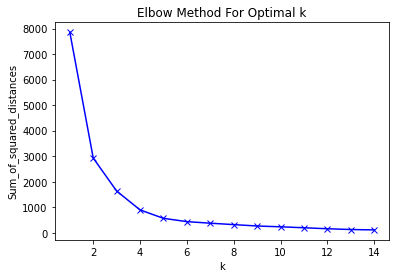

In [49]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [50]:
# Use n_clusters=5 as the k value

kmeans = KMeans(n_clusters=5)

In [52]:
# Fit the model to the data
kmeans.fit(percent_df)

KMeans(n_clusters=5)

In [53]:
# Predict the clusters
predicted_clusters = kmeans.predict(percent_df)

In [54]:
predicted_clusters

array([4, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
# plt.scatter(percent_df[:, 0], percent_df[:, 1], c=predicted_clusters, s=50, cmap='viridis')

In [133]:
# percent_df[:, 8]

In [60]:
# df_coal = merge_2000[['country', 'coal_percent']]
# df_coal

,country,coal_percent
0,Canada,1.381896
1,Mexico,0.295957
2,US,24.420776
4,Argentina,0.029184
5,Brazil,0.587282
...,...,...
92,South Korea,1.939251
93,Sri Lanka,0.000015
94,Taiwan,1.242199
95,Thailand,0.356203


In [61]:
# df_coal_T = df_coal.T
# df_coal_T

,0,1,2,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
country,Canada,Mexico,US,Argentina,Brazil,Chile,Colombia,Ecuador,Peru,Trinidad & Tobago,...,Malaysia,New Zealand,Pakistan,Philippines,Singapore,South Korea,Sri Lanka,Taiwan,Thailand,Vietnam
coal_percent,1.3819,0.295957,24.4208,0.0291837,0.587282,0.145144,0.122124,0,0.0284505,0,...,0.112238,0.0499559,0.0916211,0.181268,0,1.93925,1.53696e-05,1.2422,0.356203,0.211852


In [66]:
# df_coal_T.columns = df_coal_T.iloc[0]

In [134]:
# df_coal_T = df_coal_T.drop([0], axis=1)

In [135]:
# Sum_of_squared_distances = []
# K = range(1,15)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(df_coal_T)
#     Sum_of_squared_distances.append(km.inertia_)

In [72]:
merge_2000 = merge_2000.dropna()

In [73]:
X= merge_2000.iloc[:, [9,14]].values

In [74]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

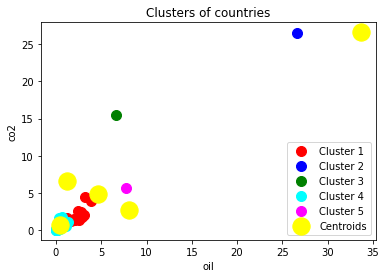

In [76]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countries')
plt.xlabel('oil')
plt.ylabel('co2')
plt.legend()
plt.show()



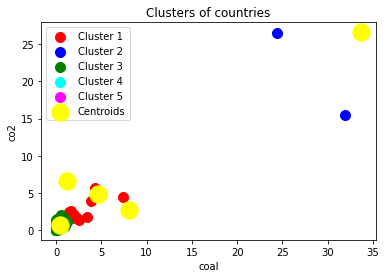

In [79]:
X= merge_2000.iloc[:, [13,14]].values

#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of countries')
plt.xlabel('coal')
plt.ylabel('co2')
plt.legend()
plt.show()


In [78]:
y_kmeans

array([0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 4, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 1, 4, 0, 4, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2])

In [21]:
merge_2000

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
2,US,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
4,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
5,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,South Korea,0.001010,4.520645,0.713079,1.089637,0.040096,1.797167,440.653852,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094
93,Sri Lanka,0.000038,0.146730,0.000000,0.000000,0.032042,0.000014,10.567441,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804
94,Taiwan,0.010596,1.900792,0.243626,0.385028,0.045600,1.151186,235.738772,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724
95,Thailand,0.005269,1.516132,0.763033,0.000000,0.058914,0.330105,169.725672,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853


In [121]:
merge_2000.fillna(0)
merge_2000.isna().sum()

country              0
renewable            1
oil                  1
gas                  1
nuclear              1
hydroelec            1
coal                 1
co2_emission         1
renewable_percent    1
oil_percent          1
gas_percent          1
nuclear_percent      1
hydroelec_percent    1
coal_percent         1
co2_percent          1
dtype: int64

In [122]:
merge_2000.to_csv('clustering_data_2000.csv', index=False)

In [93]:
oil_data = merge_2000[['oil_percent', 'co2_percent']]
oil_data

,oil_percent,co2_percent
0,2.728782,2.436681
1,2.648448,1.634185
2,26.608555,26.512908
4,0.604352,0.576261
5,2.581971,1.393412
...,...,...
92,3.136278,2.035094
93,0.101797,0.048804
94,1.318708,1.088724
95,1.051843,0.783853


In [94]:
oil_data = oil_data.fillna(0)

oil_data.isna().sum()

oil_percent    0
co2_percent    0
dtype: int64

In [32]:
# oil_data = merge_2000.iloc[:, [9,14]].values

In [81]:
oil_data['co2_percent'].max()

26.51290805068236

In [84]:
oil_data.describe()

,oil_percent,co2_percent
count,82.000000,82.000000
mean,1.219512,1.219512
std,3.142259,3.415257
min,0.000000,0.000000
25%,0.190558,0.146914
50%,0.366283,0.291543
75%,1.021054,1.066166
max,26.608555,26.512908


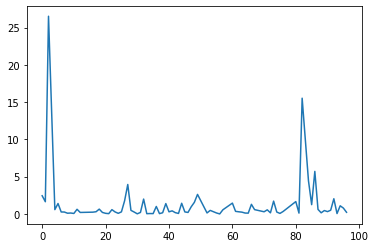

In [95]:
plt.plot(oil_data['co2_percent'])
plt.show()

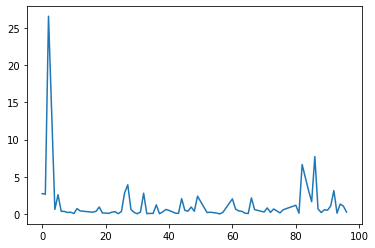

In [96]:
plt.plot(oil_data['oil_percent'])
plt.show()

In [97]:
oil_greater5 = oil_data[oil_data['oil_percent']>5]
oil_greater5

,oil_percent,co2_percent
2,26.608555,26.512908
82,6.646360,15.521671
86,7.728742,5.704774


In [98]:
oil_less_than_5 = oil_data.drop([2, 82, 86]) 

In [66]:
# mms = MinMaxScaler()
# mms.fit(oil_data)
# data_transformed = mms.transform(oil_data)

In [99]:
kmeans = KMeans(n_clusters=5)

In [100]:
kmeans.fit(oil_less_than_5)

KMeans(n_clusters=5)

In [101]:
# Predict the clusters
predicted_clusters = kmeans.predict(oil_less_than_5)

In [102]:
predicted_clusters

array([4, 4, 0, 4, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 4,
       1, 0, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 2, 0, 3, 3, 3, 4, 0, 3, 2, 2,
       4, 3, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 4, 0, 3, 0, 3, 2, 3, 3, 0, 2,
       3, 1, 2, 0, 3, 0, 0, 0, 4, 3, 2, 2, 3])

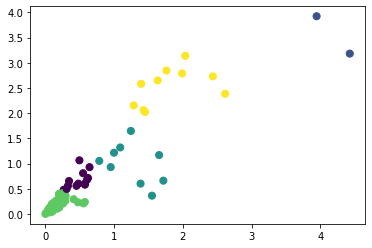

In [103]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(oil_less_than_5['co2_percent'], oil_less_than_5['oil_percent'], c=predicted_clusters, s=50, cmap='viridis')

In [130]:
oil_greater3= oil_data[oil_data['oil_percent']>3]
oil_greater3

,oil_percent,co2_percent
2,26.608555,26.512908
27,3.922261,3.946030
82,6.646360,15.521671
84,3.180701,4.429128
86,7.728742,5.704774
92,3.136278,2.035094


In [131]:
oil_less_than_3 = oil_data.drop([2, 27, 82, 84, 86, 92]) 

In [110]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(oil_less_than_3)

# Predict the clusters
predicted_clusters_3 = kmeans.predict(oil_less_than_3)
predicted_clusters_3

array([2, 2, 3, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 4, 3, 0, 3, 0, 1, 0, 0, 3, 1, 0,
       4, 3, 0, 3, 3, 3, 0, 1, 3, 0])

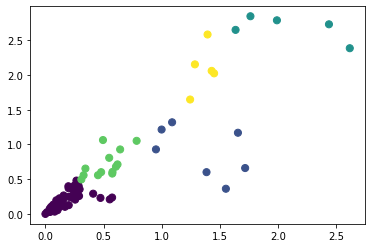

In [112]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(oil_less_than_3['co2_percent'], oil_less_than_3['oil_percent'], c=predicted_clusters_3, s=50, cmap='viridis')

In [113]:
oil_less_than_3['clusters'] = predicted_clusters_3
oil_less_than_3

,oil_percent,co2_percent,clusters
0,2.728782,2.436681,2
1,2.648448,1.634185,2
4,0.604352,0.576261,3
5,2.581971,1.393412,4
6,0.355576,0.260262,0
...,...,...,...
91,1.063108,0.494608,3
93,0.101797,0.048804,0
94,1.318708,1.088724,1
95,1.051843,0.783853,3
